In [79]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from copy import copy

In [80]:
class KMeans():
    
    """
    KMeans(K=number of clusters to be leanred(int or float))
    
    Attributes
    =============
    K = (int or float) K value for KMeans clustering
    cluster_centers = NDArray of cluster centers of dimentinon KxD,where D is the dimention of datapoints
    cluster_idx = NDArray . entries correspond to the cluster cluster_centers[cluster_idx]
    init_cluster_center = NDArray.cluster centers initally guessed.
    
    Methoeds
    ==============
    fit(X,max_iters)
        X - NDArray expected of shape NxD. N is total number of datapoints . D is the dimentino of data points.
        max_iters - int, maximum iterations.
        
    ToDo:
        breaking based on convergence.
    """
    def __init__(self,K):
        self.K=K
        self.cluster_centers = None
        self.cluster_idx = None
        self.init_cluster_ceters = None
    
    def predict(self,X):
    
        return np.argmin(self.compute_distances(X,self.cluster_centers))
    
    def compute_distances(self,X,centroids ):
        """

        Computing distances between datapoints X and centroids in `centroids`.


        Parameters
        ===========
        X: NDArray of size NxD , where N is the total number of datapoints. D is Dimention of the datapoints.
        centroids: NDArray of size KxD, where K is number of clusters to be found. D is dimention of datapoints.


        Returns
        ============

        distances: NDArray of size KxN. row j has  the distance of ith point to hte jth centroid.


        """
        distances = np.empty((centroids.shape[0] , X.shape[0]))
        for idx,centroid in enumerate(centroids):
                distances[idx,:] = np.sqrt( (((X) - (centroid))**2).sum(axis=1) )

        return np.array(distances)
    
    
    def fit(self, X,max_iters =10):
        """
        Parameters
        ========
        X is an ND Array
        
    
        """
        centroids = X[np.random.choice(X.shape[0], self.K),:]
        self.init_cluster_ceters = copy(centroids)
        
        for iters_ in range(max_iters):
            distances = self.compute_distances(X,centroids)
            nearest_cluster =  np.argmin(distances,axis=0)
            for i in range(self.K):
                centroids[i,:] = X[nearest_cluster==i].mean(axis=0)
            
        
            
        
        
        self.cluster_centers = centroids
        self.cluster_idx = nearest_cluster


In [105]:
class Spectral_Clustering():
    def __init__(self):
        pass

    def Laplacian(self,X,n):
        """To create the Laplacian Matrix for the given data

        Args:
            X (ndarray): Contains data points with their x,y coordinates        
            n (int): n-nearest neighbours

        Returns:
            ndarray: Laplacian matrix
        """
        c =  kneighbors_graph(X,n, mode='connectivity')
        Adj_mat = (1/2)*(c + c.T)
        lap = sparse.csgraph.laplacian(csgraph=Adj_mat, normed=False)
        return lap.toarray()
    
    def spectrum(self,G):
        """Computes the real eigen values and vectors

        Args:
            G (ndarray): Laplacian matrix

        Returns:
            ndarray: eigen values and eigen vectors
        """
        e_val , e_vec = linalg.eig(G)
        return np.real(e_val) , np.real(e_vec)
    
    def first_eig_vectors(self,vals,vecs):
        """eigen vectors corresponding to zero eigen values

        Args:
            vals (ndarray): eigen values of laplacian matrix
            vecs (ndarray): eigen vectors of laplacian matrix

        Returns:
            dataframe: dataframe with eigen vectors in the columns
        """
        eigenvals_sorted_indices = np.argsort(vals)
        eigenvals_sorted = vals[eigenvals_sorted_indices]
        zero_eigenvals_index = np.argwhere(abs(vals) < 1e-5)
        vals[zero_eigenvals_index]
        proj_df = pd.DataFrame(vecs[:, zero_eigenvals_index.squeeze()])
        return proj_df.to_numpy()
    
    def k_means(self,X,n):
        """Calls the KMeans class defined above

        Args:
            X (ndarray): Initial data
            n (int): Value of k

        Returns:
            ndarray: Cluster labels
        """
        k = KMeans(n)
        k.fit(X,max_iters=100)
        cluster_labels = k.cluster_idx
        return cluster_labels

    def plot(self,X,cluster_labels):
        """Plot the graph with initial data and predicted labels

        Args:
            X (ndarray): initial data
            cluster_labels (ndarray): predicted labels for the data
        """

        X_df = pd.DataFrame(X, columns=['x','y'])
        X_df['cluster'] = ['c_' + str(c) for c in cluster_labels]
        fig, ax = plt.subplots()
        sns.scatterplot(x='x', y='y', data=X_df,hue='cluster', ax=ax)
        ax.set(title='Spectral Clustering');






In [106]:
def generate_circle_sample_data(r, n, sigma):

    """
    Generate circle data with random Gaussian noise.

    Parameters
    ========
    r: radius of the circle
    n: number of data points
    sigma: standard deviation

    Return
    ========
    x: x coordinate of the point
    y: y coordinate of the point

    """
    angles = np.random.uniform(low=0, high=2*np.pi, size=n)

    x_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)
    y_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)

    x = r*np.cos(angles) + x_epsilon
    y = r*np.sin(angles) + y_epsilon
    return x, y

def generate_concentric_circles_data(param_list):
    coordinates = [generate_circle_sample_data(param[0], param[1], param[2]) for param in param_list]
    return coordinates

def generate_coordinates(n,radiuss,sigmas):
    """Gives the coordinates of the points as a list of tuples with x and y coordinates

    Args:
        n (int): number of points
        radiuss (List): list of radiuses of concentric circles
        sigmas (List): standard deviations for the points

    Returns:
        List: Contains all the points as tuples

    """
    param_lists = [[(r, n, sigma) for r in radiuss] for sigma in sigmas] 
    # We store the data on this list.
    coordinates_list = []

    #fig, axes = plt.subplots(3, 1, figsize=(7, 21))

    for i, param_list in enumerate(param_lists):

        coordinates = generate_concentric_circles_data(param_list)

        coordinates_list.append(coordinates)
    
    x_coord = []
    y_coord = []
    points = []
    for i in range(len(radiuss)):
        for j in range(n):
            x_coord.append(coordinates_list[0][i][0][j])
            y_coord.append(coordinates_list[0][i][1][j])
    
    [points.append((x_coord[i],y_coord[i])) for i in range(len(x_coord))]

    return points

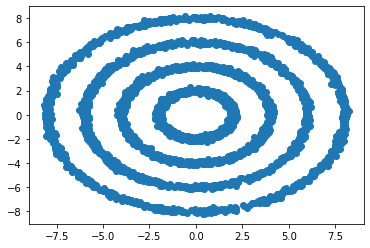

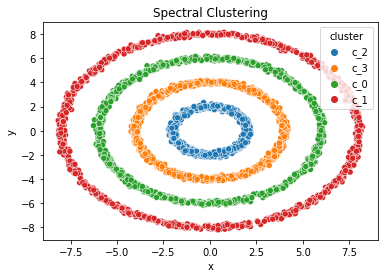

In [108]:
n = 1000
rad = [2,4,6,8]
sig = [0.1]
point = generate_coordinates(n,rad,sig)
X = np.array(point)
plt.scatter(X[:,0] , X[:,1])
sp = Spectral_Clustering()
lap = sp.Laplacian(X,8)
e_val , e_vec = sp.spectrum(lap)
data = sp.first_eig_vectors(e_val , e_vec)
labels = sp.k_means(data,4)
sp.plot(X,labels)

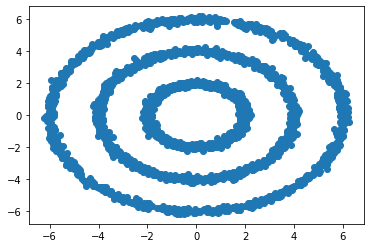

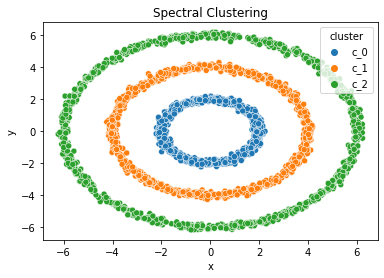

In [120]:
n = 1000
rad = [2,4,6]
sig = [0.1]
point = generate_coordinates(n,rad,sig)
X = np.array(point)
plt.scatter(X[:,0] , X[:,1])
sp = Spectral_Clustering()
lap = sp.Laplacian(X,8)
e_val , e_vec = sp.spectrum(lap)
data = sp.first_eig_vectors(e_val , e_vec)
labels = sp.k_means(data,3)
sp.plot(X,labels)

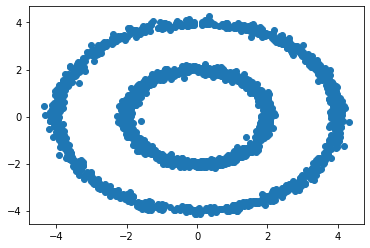

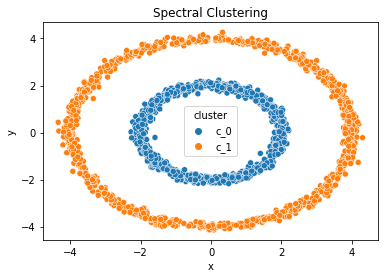

In [121]:
n = 1000
rad = [2,4]
sig = [0.1]
point = generate_coordinates(n,rad,sig)
X = np.array(point)
plt.scatter(X[:,0] , X[:,1])
sp = Spectral_Clustering()
lap = sp.Laplacian(X,8)
e_val , e_vec = sp.spectrum(lap)
data = sp.first_eig_vectors(e_val , e_vec)
labels = sp.k_means(data,2)
sp.plot(X,labels)

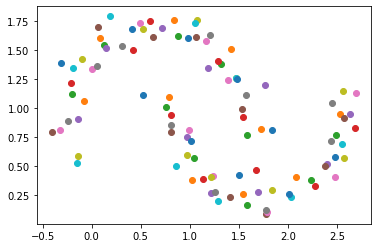

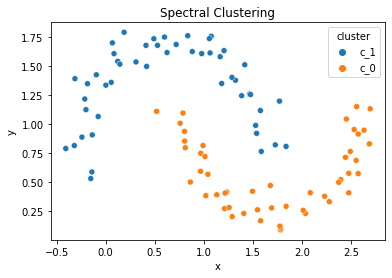

In [115]:
points = []
for i in range(1,100):
    a = i*0.0628319
    x = np.cos(a) + (i>50) + np.random.normal(7)*0.1
    y = np.sin(a) + (i>50)*0.5 +  np.random.normal(7)*0.1
    plt.scatter(x,y)
    points.append((x,y))

X = np.array(points)

sp = Spectral_Clustering()
lap = sp.Laplacian(X,4)
e_val , e_vec = sp.spectrum(lap)
data = sp.first_eig_vectors(e_val , e_vec)
labels = sp.k_means(data,2)
sp.plot(X,labels)

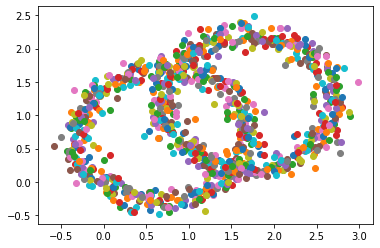

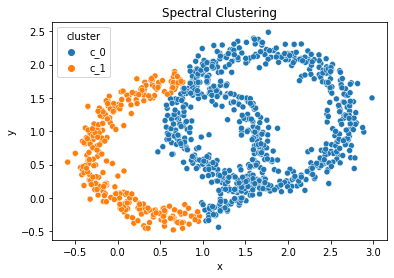

In [118]:
points = []
for i in range(1,1000):
    a = i
    x = np.cos(a) + (i>500) + np.random.normal(7)*0.1
    y = np.sin(a) + (i>500)*0.5 +  np.random.normal(7)*0.1
    plt.scatter(x,y)
    points.append((x,y))

X = np.array(points)

sp = Spectral_Clustering()
lap = sp.Laplacian(X,5)
e_val , e_vec = sp.spectrum(lap)
data = sp.first_eig_vectors(e_val , e_vec)
labels = sp.k_means(data,2)
sp.plot(X,labels)
